In [1]:
import os
os.chdir("D:\Data Science\Second_Project")

In [2]:
import pandas as pd
import numpy as py

In [27]:
bike_data=pd.read_excel("bike_data.xlsx")

In [ ]:
#Import Missing values using KNN
from fancyimpute import KNN
bike_data=pd.DataFrame(KNN(k=3).complete(bike_data),columns=bike_data.columns)

In [28]:
bike_data=pd.DataFrame(bike_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x29028dddc88>,
 'caps': [<matplotlib.lines.Line2D at 0x29028de7cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x29028ddd320>],
 'medians': [<matplotlib.lines.Line2D at 0x29028dee710>],
 'fliers': [<matplotlib.lines.Line2D at 0x29028deef28>],
 'means': []}

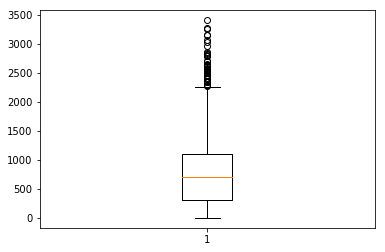

In [29]:
#Detecting Outliers
import matplotlib.pyplot as plt
plt.boxplot(bike_data['casual'])

In [6]:
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
cnames=['hum','windspeed','casual']

In [31]:
#Detect and delete outliers from data
for i in cnames:
    q75,q25=py.percentile(bike_data.loc[:,i],[75,25])
    iqr=q75-q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    bike_data=bike_data.drop(bike_data[bike_data.loc[:,i]<min_value].index)
    bike_data=bike_data.drop(bike_data[bike_data.loc[:,i]>max_value].index)

In [32]:
bike_data=pd.read_excel("Outliers_removed_data.xlsx")

In [33]:
#Correlation Analysis
df_numeric_variables=['instant','temp','atemp','hum','windspeed','casual','registered','cnt']

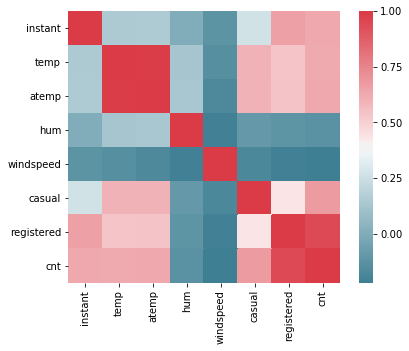

In [34]:
import seaborn as sns
df_corr=bike_data.loc[:,df_numeric_variables]
#set height and width of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=py.zeros_like(corr, dtype=py.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [35]:
#Dimension Reduction
bike_data=bike_data.drop(['atemp','instant','windspeed','dteday'],axis=1)

In [36]:
#Anova Testing
#Save Categorical Variables
cat_names=['season','yr','mnth','holiday','weekday','weathersit','workingday']

In [37]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod=ols('cnt ~ season',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ yr',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ mnth',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ holiday',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ weekday',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ weathersit',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

mod=ols('cnt ~ workingday',data=bike_data).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df          F        PR(>F)
weathersit  2.422888e+08    1.0  70.729298  2.150976e-16
Residual    2.497247e+09  729.0        NaN           NaN
                  sum_sq    

In [38]:
bike_data=bike_data.drop(['holiday','weekday','workingday','season'],axis=1)

In [40]:
bike_data.shape

In [19]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
train_data, test_data = train_test_split(bike_data, test_size=0.2)

In [43]:
model = sm.OLS(train_data.iloc[:,7], train_data.iloc[:,0:7]).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.766e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:01:51   Log-Likelihood:                -4095.9
No. Observations:                 584   AIC:                             8206.
Df Residuals:                     577   BIC:                             8236.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr            92.7623     32.667      2.840      0.005      28.602     156.922
mnth          -0.2029      3.634     -0.056      0.955      -7.341       6.935
weathersit    11.1680     28.815      0.388      0.698     -45.427      67.763
temp          18.1351     97.664      0.186      0.853    -173.684     209.955
hum          -59.6068     90.288     -0.660      0.509    -236.941     117.727
casual         1.1709      0.028     42.152      0.000       1.116       1.225
registered     0.9739      0.012     78.608      0.000       0.950       0.998
==============================================================================
Omnibus:                      492.361   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8384.222
Skew:                           3.825   Prob(JB):                         0.00
Kurtosis:                      19.913   Cond. No.                     3.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Decision Tree Algorithm
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
train,test=train_test_split(bike_data,test_size=0.2)

In [47]:
#Decision Tree Model
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:7], train.iloc[:,7])
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:7])

In [48]:
predictions_DT

array([ 4514.30392157,  4514.30392157,  6600.40837696,  3201.34722222,
        4514.30392157,  4514.30392157,  6600.40837696,  6600.40837696,
        6600.40837696,  6600.40837696,  6600.40837696,  6600.40837696,
        6600.40837696,  4514.30392157,  6600.40837696,  1601.47863248,
        4514.30392157,  6600.40837696,  1601.47863248,  6600.40837696,
        1601.47863248,  3201.34722222,  4514.30392157,  6600.40837696,
        4514.30392157,  1601.47863248,  3201.34722222,  4514.30392157,
        4514.30392157,  6600.40837696,  6600.40837696,  4514.30392157,
        4514.30392157,  3201.34722222,  4514.30392157,  4514.30392157,
        4514.30392157,  3201.34722222,  4514.30392157,  6600.40837696,
        1601.47863248,  6600.40837696,  6600.40837696,  4514.30392157,
        1601.47863248,  3201.34722222,  4514.30392157,  6600.40837696,
        6600.40837696,  4514.30392157,  4514.30392157,  3201.34722222,
        4514.30392157,  6600.40837696,  6600.40837696,  3201.34722222,
      

In [49]:
#Error Metrics
def MAPE(y_true,y_pred):
    mape=py.mean(py.abs((y_true-y_pred)/y_true))
    return mape

In [52]:
MAPE(test.iloc[:,6],predictions_DT)

0.23239669230607973